**SIMULATED ANNEALING ALGORITHM**

**pr76 Dataset (Optimal Solution - 108159)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

**Define Coordinate Class**

In [2]:
class Coordinate:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    #Calculate Euclidean distance between two coordinates
    @staticmethod
    def get_distance(a, b):
        return math.sqrt((a.x - b.x) ** 2 + (a.y - b.y) ** 2)
    
    #Compute total distance for a given route
    @staticmethod
    def get_total_distance(coords):
        dist = sum(Coordinate.get_distance(a, b) for a, b in zip(coords[:-1], coords[1:]))
        dist += Coordinate.get_distance(coords[0], coords[-1])
        return dist

**Load Dataset**

In [3]:
coordinates = [
    (3600, 2300), (3100, 3300), (4700, 5750), (5400, 5750), (5608, 7103), (4493, 7102),
    (3600, 6950), (3100, 7250), (4700, 8450), (5400, 8450), (5610, 10053), (4492, 10052),
    (3600, 10800), (3100, 10950), (4700, 11650), (5400, 11650), (6650, 10800), (7300, 10950),
    (7300, 7250), (6650, 6950), (7300, 3300), (6650, 2300), (5400, 1600), (8350, 2300),
    (7850, 3300), (9450, 5750), (10150, 5750), (10358, 7103), (9243, 7102), (8350, 6950),
    (7850, 7250), (9450, 8450), (10150, 8450), (10360, 10053), (9242, 10052), (8350, 10800),
    (7850, 10950), (9450, 11650), (10150, 11650), (11400, 10800), (12050, 10950),
    (12050, 7250), (11400, 6950), (12050, 3300), (11400, 2300), (10150, 1600), (13100, 2300),
    (12600, 3300), (14200, 5750), (14900, 5750), (15108, 7103), (13993, 7102), (13100, 6950),
    (12600, 7250), (14200, 8450), (14900, 8450), (15110, 10053), (13992, 10052), (13100, 10800),
    (12600, 10950), (14200, 11650), (14900, 11650), (16150, 10800), (16800, 10950),
    (16800, 7250), (16150, 6950), (16800, 3300), (16150, 2300), (14900, 1600), (19800, 800),
    (19800, 10000), (19800, 11900), (19800, 12200), (200, 12200), (200, 1100), (200, 800)
]


**Simulated Annealing Algorithm**

In [4]:
#SA params: 
# T0 = initial temperature
# r = cooling rate 
# max_iterations = max number of iterations

def Simulated(T0=40000, r=0.80, max_iterations=1000):

    #Turns dataset into Coordinate objects
    coords = [Coordinate(x, y) for x, y in coordinates]

    best_route = coords[:]
    best_distance = Coordinate.get_total_distance(coords)

    start_time = time.time()
    T = T0

    for _ in range(max_iterations):
        L = np.random.randint(10, 31)
        for _ in range(L):
            r1, r2 = np.random.randint(0, len(coords), size=2) 
            coords[r1], coords[r2] = coords[r2], coords[r1]

            current_distance = Coordinate.get_total_distance(coords) #swap cities

            #Acceptance probability
            if current_distance < best_distance or np.random.uniform() < np.exp((best_distance - current_distance) / T):
                best_distance = current_distance
                best_route = coords[:]
            else:
                coords[r1], coords[r2] = coords[r2], coords[r1] #revert swap

        T *= r
    
    best_route.append(best_route[0])

    end_time = time.time()
    cpu_time = end_time - start_time

    best_tour_indices = [coordinates.index((c.x, c.y)) for c in best_route]

    print(f"Best Tour: {best_tour_indices}")
    print(f"Best Length: {best_distance:.2f}")
    print(f"CPU Time: {cpu_time:.4f} seconds")

    fig, ax = plt.subplots(figsize=(10, 6))

    for first, second in zip(best_route[:-1], best_route[1:]):
        ax.plot([first.x, second.x], [first.y, second.y], 'b')
    ax.plot([best_route[0].x, best_route[-1].x], [best_route[0].y, best_route[-1].y], 'b')

    for i, c in enumerate(best_route):
        ax.plot(c.x, c.y, 'ro')
        ax.text(c.x + 1, c.y + 1, f'{i}', color='black', fontsize=8)

    ax.set_title('Simulated Annealing for Symmetric TSP')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    plt.show()


Implementations

1st

Best Tour: [15, 14, 12, 13, 73, 7, 6, 1, 0, 22, 21, 18, 30, 59, 58, 60, 61, 57, 75, 74, 2, 19, 29, 28, 27, 41, 53, 52, 51, 48, 49, 66, 67, 47, 42, 32, 33, 38, 37, 35, 36, 17, 16, 10, 11, 4, 23, 45, 50, 65, 55, 54, 56, 62, 63, 72, 71, 70, 64, 69, 68, 46, 44, 43, 26, 25, 9, 8, 5, 3, 20, 24, 31, 40, 39, 34, 15]
Best Length: 178758.07
CPU Time: 2.9188 seconds


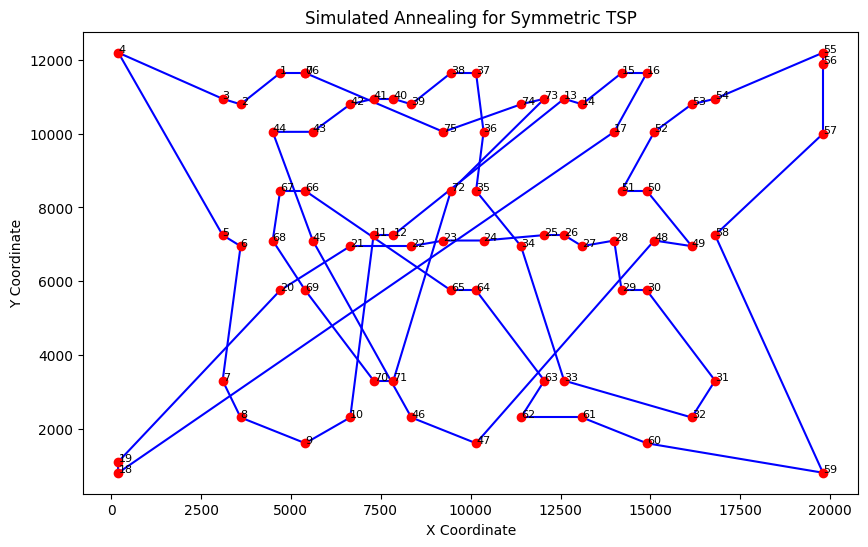

In [5]:
Simulated()

2nd

Best Tour: [34, 32, 53, 52, 48, 49, 65, 50, 55, 56, 54, 51, 44, 45, 23, 26, 42, 41, 57, 58, 59, 15, 14, 73, 13, 12, 11, 10, 7, 6, 2, 20, 24, 21, 22, 0, 75, 74, 1, 3, 19, 31, 33, 38, 39, 40, 60, 61, 62, 63, 72, 71, 70, 64, 66, 69, 67, 68, 46, 5, 8, 9, 4, 18, 30, 29, 25, 43, 47, 27, 28, 16, 17, 36, 35, 37, 34]
Best Length: 158196.27
CPU Time: 3.0230 seconds


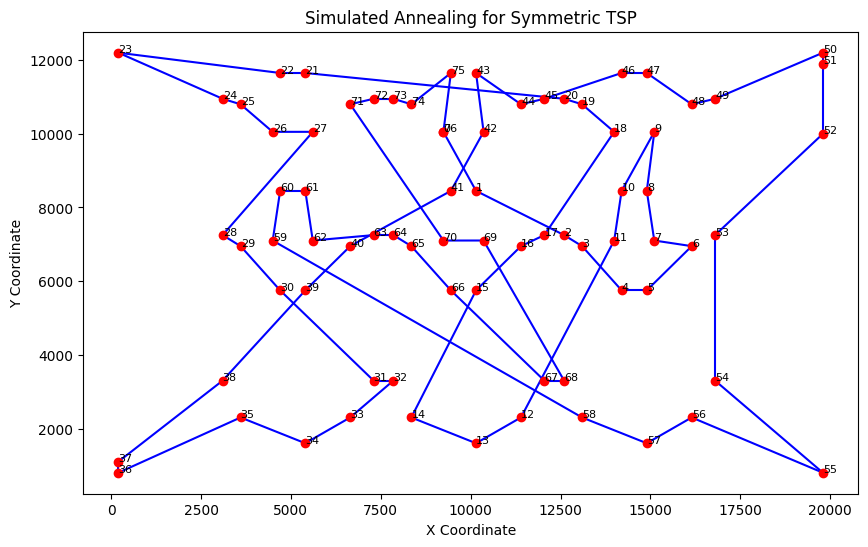

In [6]:
Simulated()

3rd

Best Tour: [21, 22, 0, 1, 30, 33, 39, 40, 59, 53, 41, 32, 36, 17, 16, 10, 9, 18, 19, 4, 8, 11, 15, 14, 12, 13, 73, 7, 6, 28, 27, 31, 34, 38, 37, 35, 5, 2, 3, 29, 25, 26, 42, 47, 43, 44, 46, 48, 49, 50, 54, 57, 58, 60, 61, 63, 62, 56, 55, 65, 64, 70, 71, 72, 51, 52, 20, 74, 75, 23, 45, 66, 69, 67, 68, 24, 21]
Best Length: 173092.84
CPU Time: 2.4119 seconds


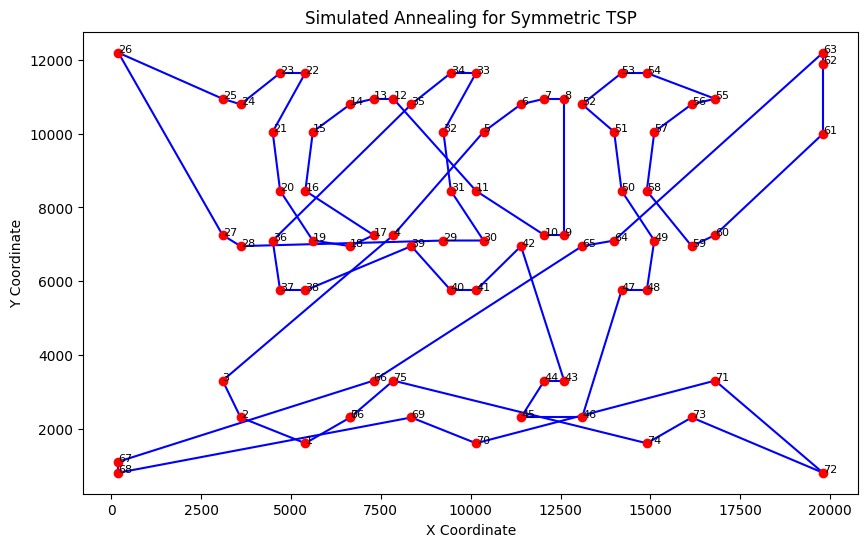

In [7]:
Simulated()

4th

Best Tour: [53, 41, 42, 26, 44, 43, 47, 48, 49, 51, 52, 24, 20, 3, 6, 7, 1, 0, 75, 74, 8, 11, 10, 16, 17, 36, 35, 30, 29, 28, 32, 31, 18, 19, 4, 23, 45, 46, 68, 55, 56, 61, 60, 59, 40, 39, 33, 34, 9, 5, 2, 22, 21, 25, 27, 38, 37, 15, 12, 13, 73, 14, 58, 57, 54, 50, 66, 67, 69, 70, 71, 72, 63, 62, 64, 65, 53]
Best Length: 174739.51
CPU Time: 4.4379 seconds


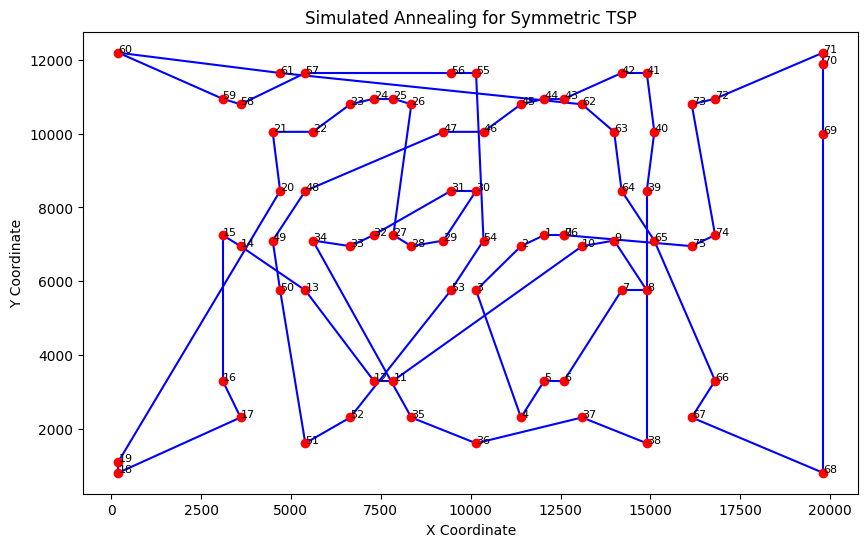

In [8]:
Simulated()

5th

Best Tour: [16, 17, 37, 38, 60, 72, 71, 70, 63, 62, 61, 47, 43, 44, 45, 23, 24, 3, 19, 18, 30, 31, 32, 27, 28, 29, 20, 21, 22, 46, 68, 67, 49, 48, 50, 55, 54, 34, 10, 12, 13, 73, 74, 75, 0, 1, 2, 5, 11, 14, 15, 36, 35, 39, 40, 51, 52, 53, 41, 42, 25, 26, 66, 69, 64, 65, 56, 57, 58, 59, 33, 4, 6, 7, 8, 9, 16]
Best Length: 172006.31
CPU Time: 3.1092 seconds


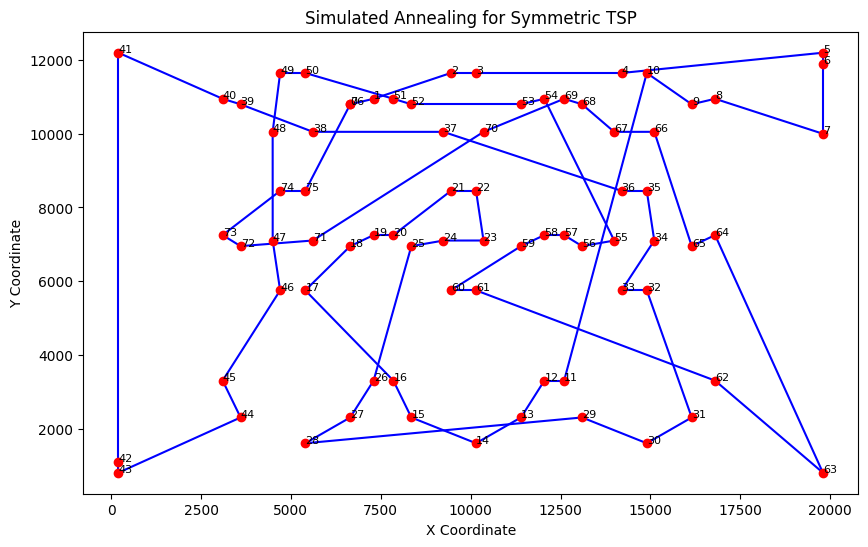

In [9]:
Simulated()

6th

Best Tour: [23, 24, 20, 2, 1, 0, 22, 21, 3, 4, 9, 10, 16, 17, 36, 35, 37, 38, 40, 59, 58, 57, 54, 50, 65, 55, 56, 62, 63, 61, 60, 34, 15, 14, 8, 6, 7, 73, 13, 12, 11, 18, 30, 31, 41, 53, 68, 67, 69, 66, 51, 52, 42, 28, 29, 25, 26, 43, 47, 27, 32, 33, 39, 48, 49, 64, 70, 71, 72, 19, 5, 74, 75, 45, 46, 44, 23]
Best Length: 176163.95
CPU Time: 2.7475 seconds


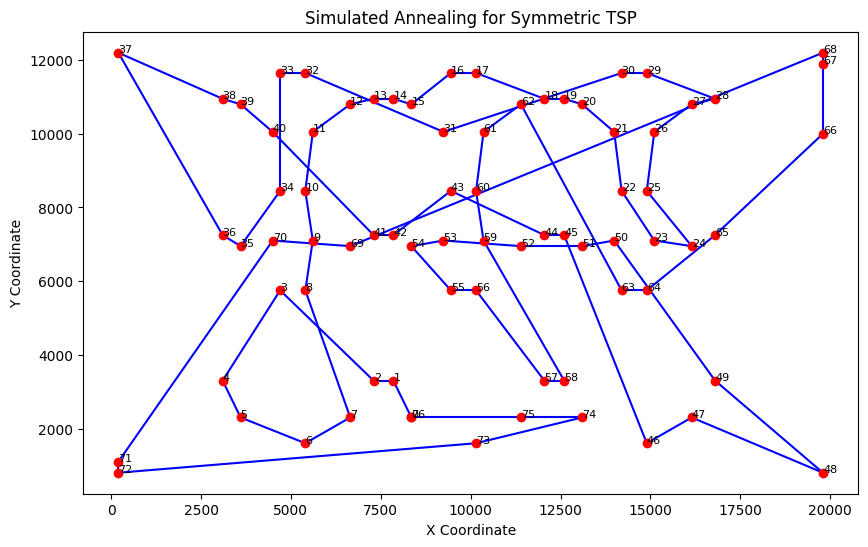

In [10]:
Simulated()

7th

Best Tour: [36, 35, 40, 59, 58, 49, 66, 69, 67, 68, 48, 53, 41, 16, 10, 11, 8, 9, 18, 19, 4, 5, 12, 13, 73, 75, 74, 0, 1, 31, 32, 34, 17, 14, 15, 72, 71, 70, 64, 65, 50, 55, 57, 60, 61, 63, 62, 56, 54, 51, 52, 43, 47, 46, 44, 24, 23, 20, 30, 29, 28, 27, 25, 3, 2, 6, 7, 22, 21, 45, 26, 42, 33, 39, 38, 37, 36]
Best Length: 176610.63
CPU Time: 2.7474 seconds


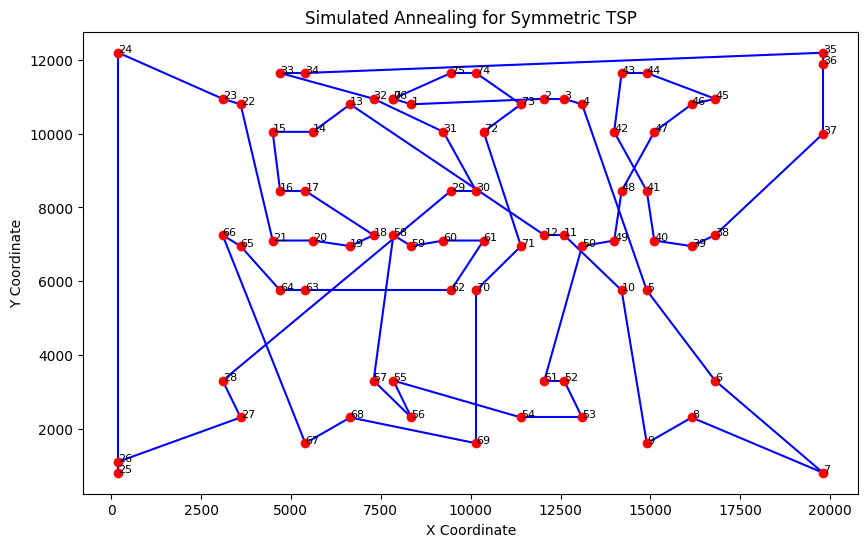

In [11]:
Simulated()

8th

Best Tour: [74, 75, 0, 22, 21, 20, 3, 2, 5, 8, 14, 15, 37, 38, 40, 57, 56, 61, 60, 58, 59, 39, 33, 34, 32, 62, 72, 71, 55, 54, 66, 67, 69, 70, 63, 64, 65, 68, 46, 47, 48, 49, 50, 51, 43, 44, 45, 23, 24, 25, 31, 17, 36, 35, 16, 10, 11, 12, 13, 73, 9, 30, 28, 29, 18, 19, 6, 7, 4, 27, 42, 41, 53, 52, 26, 1, 74]
Best Length: 168601.57
CPU Time: 3.0969 seconds


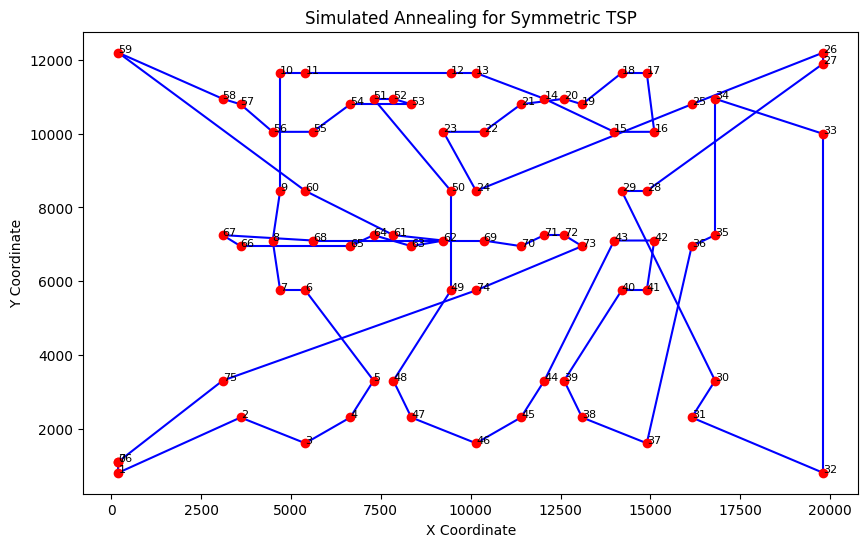

In [12]:
Simulated()

9th

Best Tour: [74, 1, 2, 3, 18, 4, 5, 73, 13, 12, 9, 8, 7, 6, 19, 41, 53, 52, 65, 64, 70, 71, 72, 63, 49, 46, 47, 43, 44, 45, 68, 67, 69, 66, 33, 34, 38, 37, 16, 17, 30, 20, 24, 23, 26, 25, 29, 28, 31, 32, 27, 42, 61, 60, 40, 39, 35, 36, 15, 14, 11, 10, 59, 58, 57, 54, 51, 48, 50, 55, 62, 56, 21, 22, 0, 75, 74]
Best Length: 175210.98
CPU Time: 2.3845 seconds


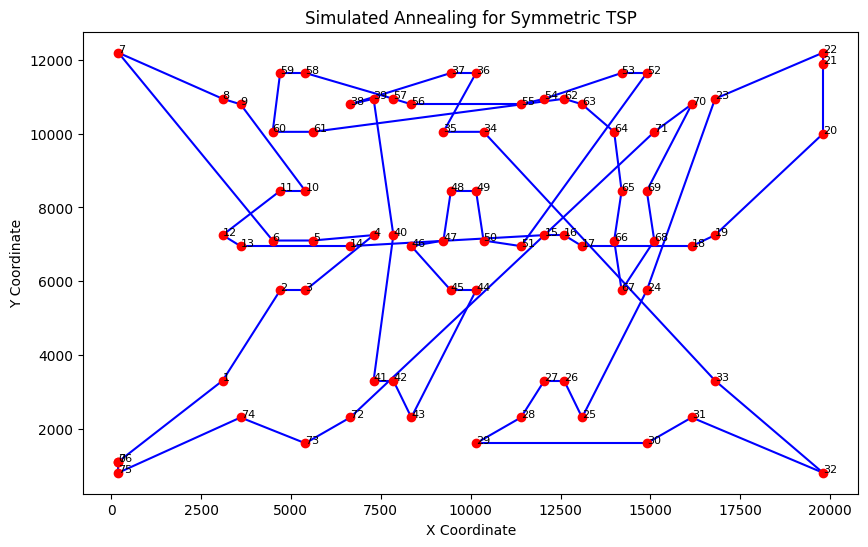

In [13]:
Simulated()

10th

Best Tour: [55, 52, 53, 9, 8, 10, 16, 17, 36, 35, 34, 28, 29, 30, 4, 5, 7, 6, 2, 20, 24, 45, 44, 47, 51, 72, 71, 70, 65, 50, 49, 48, 43, 23, 75, 74, 1, 42, 41, 54, 57, 58, 59, 40, 39, 38, 33, 31, 18, 19, 3, 0, 22, 21, 25, 26, 27, 32, 61, 60, 37, 15, 14, 73, 13, 12, 11, 46, 68, 67, 69, 66, 64, 63, 62, 56, 55]
Best Length: 180606.02
CPU Time: 2.4284 seconds


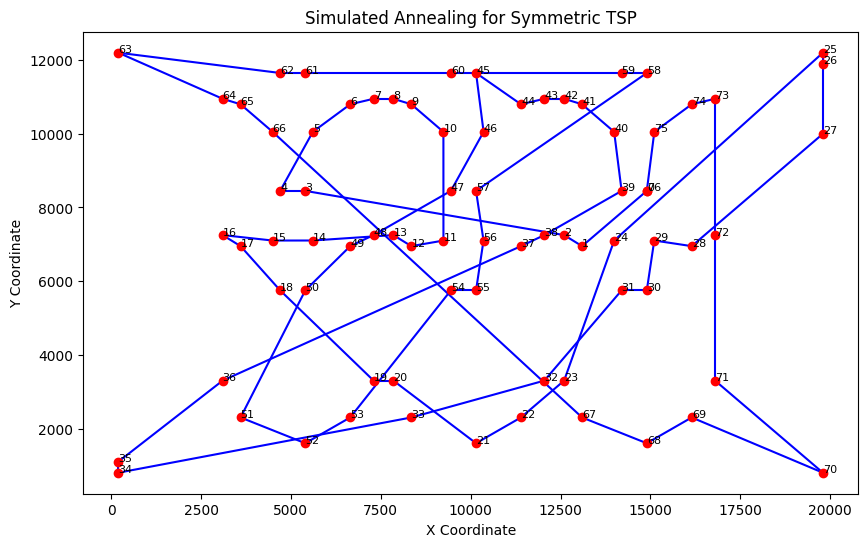

In [14]:
Simulated()